In [1]:
library(reticulate)
use_condaenv(condaenv="pyr2", conda="/data8t_0/hms/anaconda3/bin/conda")
# umap<-import('umap')

In [2]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)
datasetName = "Bladder_PartialTissue_HCLAdultBladder2"
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)

setwd("/stor/public/hcad/Bladder_PartialTissue_HCLAdultBladder2/")

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



In [3]:
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- read.table(paste0(datasetName,"_expression.tsv.gz"),h = T,sep='\t',row.names = 1)
} else{
   system(paste0("tar -zxvf ", datasetName, "_expression.tsv.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}

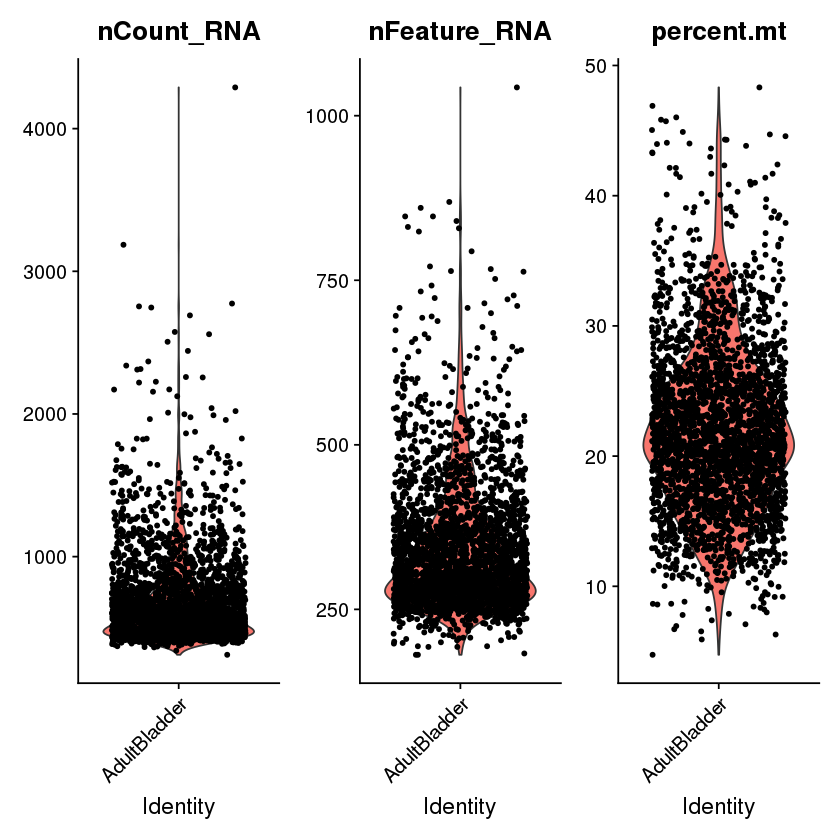

In [14]:
# Pre-processing
min.cells = 100
min.features = 150
nFeature_RNA_range = c(min.features, 1000)
percent.mt.thre = 1
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.cells = min.cells, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

# QC
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
VlnPlot(object = dataobj, features= c("nCount_RNA","nFeature_RNA","percent.mt"))

In [15]:
percent.mt.thre = 40
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)

In [16]:
warnings('off')
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix

Calculating cell attributes for input UMI matrix

Variance stabilizing transformation of count matrix of size 2549 by 2713

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2713 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=========                                                             |  12%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==========================                                            |  38%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |============================================                          |  62%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=============================================================         |  88%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 1 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 2549 genes



  |======================================================================| 100%


Computing corrected count matrix for 2549 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.372849 mins

Determine variable features

Set 2549 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt

Centering and scaling data matrix

Set default assay to SCT



PC_ 1 
Positive:  SPARCL1, B2M, AQP1, VIM, TMSB10, IFITM2, CD74, IFITM3, ACKR1, MT-RNR1 
	   SOCS3, PECAM1, IFI27, HLA-B, IGFBP7, HLA-E, LIFR, MT-RNR2, SPRY1, IGFBP4 
	   HLA-DRB1, HLA-DRA, FOS, TMSB4X, PLVAP, TGFBR2, GNG11, KLF2, EPAS1, ZFP36 
Negative:  S100P, S100A6, S100A11, KRT17, KRT19, S100A2, FABP4, FABP5, KLF5, IER3 
	   SOWAHC, CLDN4, AGR2, SLC2A1, ACTG1, ELF3, CSTB, FXYD3, GPRC5A, GSTP1 
	   DUSP5, AKR1C2, FOSL1, AQP3, FOXQ1, EZR, KRT13, RPS27, ERRFI1, ANXA1 
PC_ 2 
Positive:  DCN, LUM, COL1A2, FBLN1, MGP, ADH1B, EFEMP1, C1R, CFD, C1S 
	   C3, CCDC80, COL6A3, SCARA5, MFAP4, COL3A1, CFH, MMP2, PDGFRA, COL14A1 
	   SERPINF1, CYR61, GPX3, APOD, SFRP2, PLPP3, FOS, COL1A1, CYBRD1, FBLN5 
Negative:  AQP1, ACKR1, IFI27, CD74, PECAM1, TMSB10, HLA-DRA, LIFR, HLA-DRB1, PLVAP 
	   ADGRL4, EMCN, PCAT19, TSPAN7, MMRN2, FLT1, HLA-E, TM4SF1, CD93, EPAS1 
	   SPRY1, HLA-B, SDPR, B2M, VWF, IGFBP4, S1PR1, ITGA6, HYAL2, HLA-DPA1 
PC_ 3 
Positive:  S100A6, SPARCL1, DCN, EFEMP1, RPS18, MGP, RPL7

png 
  2

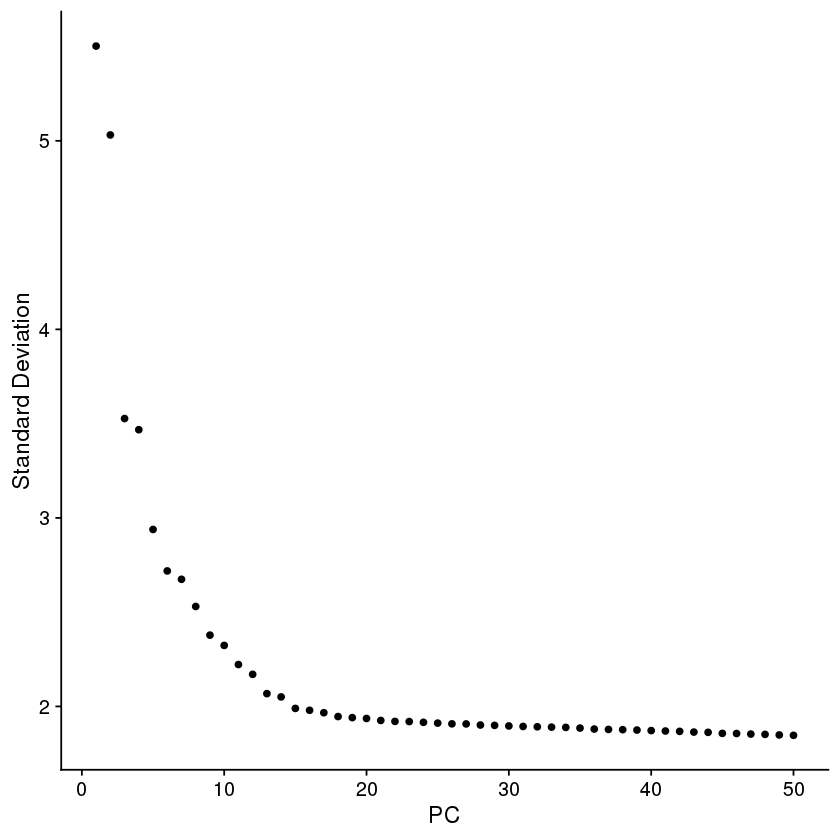

In [17]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj),npcs=50)
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj,ndim=50) 
dev.off()
ElbowPlot(dataobj,ndim=50) 

In [18]:
pcDim = 40 # set as 75 in this case 

# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph

Computing SNN



In [19]:
dataobj <- FindClusters(dataobj, resolution = 1.6, n.start = 5)
randIndex(dataobj$cell_cluster,dataobj$seurat_clusters)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2713
Number of edges: 143078

Running Louvain algorithm...
Maximum modularity in 5 random starts: 0.5807
Number of communities: 12
Elapsed time: 0 seconds


ARI 
0.2794017

In [20]:
rr <- RunUMAP(dataobj,dims=1:pcDim)

11:13:37 UMAP embedding parameters a = 0.9922 b = 1.112

11:13:37 Read 2713 rows and found 40 numeric columns

11:13:37 Using Annoy for neighbor search, n_neighbors = 30

11:13:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

11:13:38 Writing NN index file to temp file /tmp/RtmptmN77k/file21f464b52448

11:13:38 Searching Annoy index using 1 thread, search_k = 3000

11:13:39 Annoy recall = 100%

11:13:39 Commencing smooth kNN distance calibration using 1 thread

11:13:40 Initializing from normalized Laplacian + noise

11:13:40 Commencing optimization for 500 epochs, with 118024 positive edges

11:13:50 Optimization finished



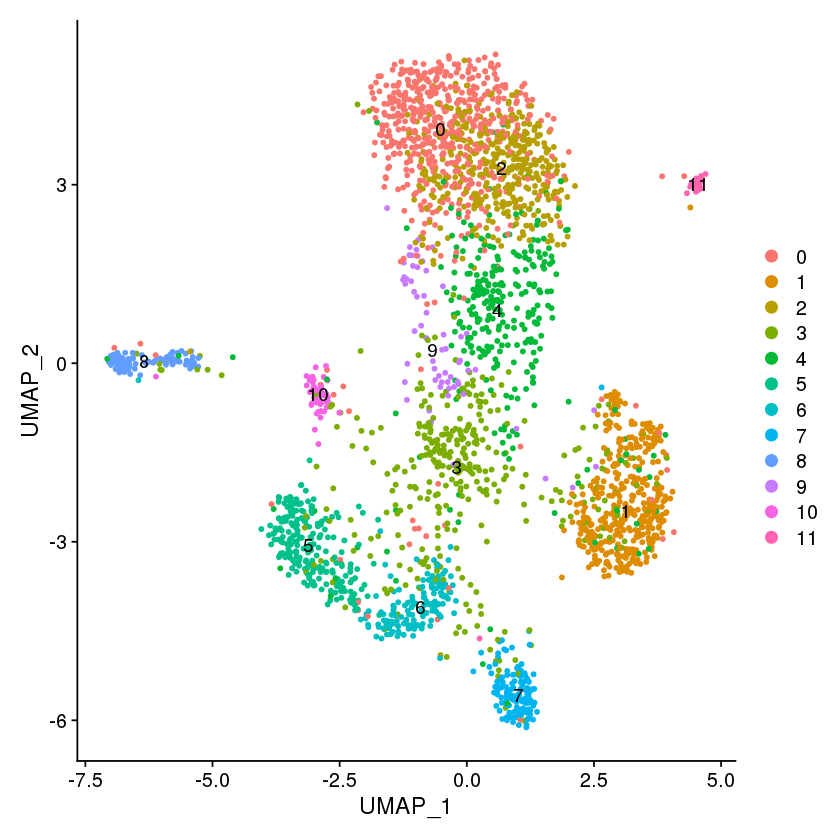

In [21]:
p_umap=DimPlot(rr,label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)
p_umap

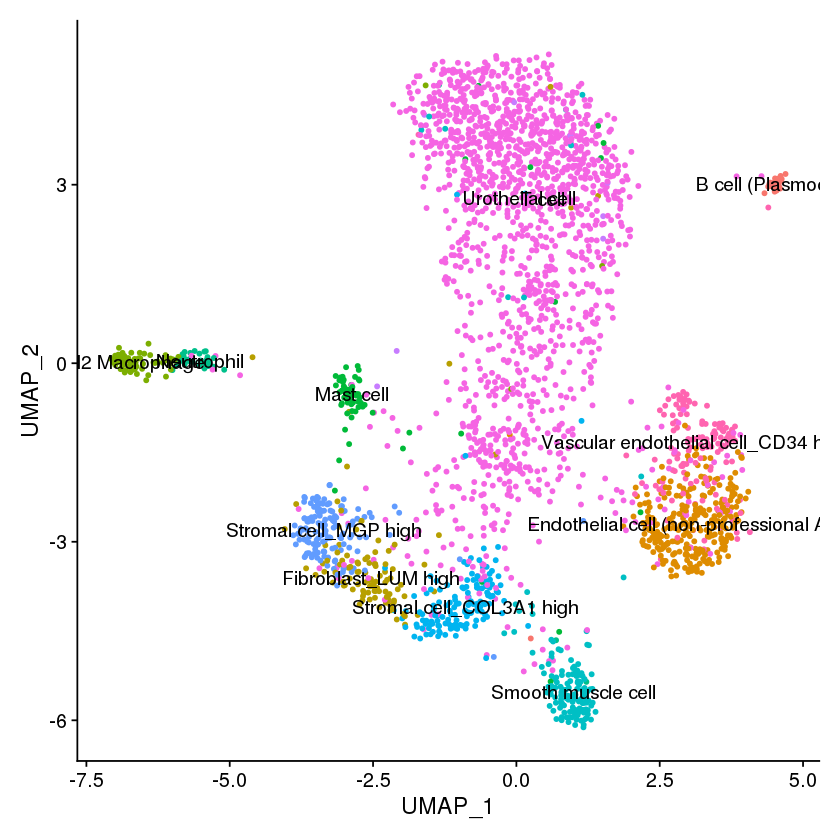

In [22]:
p_umap2 <- DimPlot(rr, reduction = "umap", label = T, group.by = "cell_cluster", pt.size=1)+NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)
p_umap2

In [36]:
new.cluster.ids <- c("Bladder-Epithelial tissue-Urothelial cell-S100P", 
                     "Bladder-Epithelial tissue-Endothelial cell-AQP1", 
                     "Bladder-Epithelial tissue-Urothelial cell-S100P", 
                     "Bladder-Epithelial tissue-Perineural epithelial cell-HES1", 
                     "Bladder-Epithelial tissue-Urothelial cell-S100P", 
                     "Bladder-Connective tissue-Stromal cell-DCN", 
                     "Bladder-Connective tissue-Stromal cell-LUM", 
                     "Bladder-Muscle tissue-Smooth muscle cell-ACTA2",
                     "Bladder-Connective tissue-Macrophage-CD74 ",
                     "Bladder-Epithelial tissue-Urothelial cell-S100P", 
                     "Bladder-Connective tissue-Mast cell-CPA3 ",
                     "Bladder-Connective tissue-B cell-JCHAIN "
                    )

In [37]:
subset(dataobj.markers,cluster=='11')
# subset(dataobj.markers,gene=='LYVE1')

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
JCHAIN,2.341667e-53,3.5317210,0.903,0.107,5.968909e-50,11,JCHAIN
IGHA2,7.666239e-48,2.2537402,0.548,0.037,1.954124e-44,11,IGHA2
SSR4,4.124735e-39,1.0184748,0.871,0.135,1.051395e-35,11,SSR4
IGHA1,5.314654e-28,3.4780822,0.710,0.124,1.354705e-24,11,IGHA1
XBP1,1.008844e-27,0.5987387,0.613,0.078,2.571544e-24,11,XBP1
IGHG1,6.449828e-27,2.5632109,0.387,0.033,1.644061e-23,11,IGHG1
RGS12,4.051142e-16,1.0340812,0.677,0.172,1.032636e-12,11,RGS1
IGKC,5.923415e-15,4.3989738,0.806,0.378,1.509878e-11,11,IGKC
HSP90B1,1.529966e-12,0.6120624,0.613,0.168,3.899883e-09,11,HSP90B1


In [38]:
names(x = new.cluster.ids) <- levels(x = dataobj)
annodataobj <- RenameIdents(object = dataobj, new.cluster.ids)

In [39]:
rr2 <- RunUMAP(annodataobj,dims=1:pcDim)

11:37:13 UMAP embedding parameters a = 0.9922 b = 1.112

11:37:13 Read 2713 rows and found 40 numeric columns

11:37:13 Using Annoy for neighbor search, n_neighbors = 30

11:37:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

11:37:14 Writing NN index file to temp file /tmp/RtmptmN77k/file21f4517ee5ff

11:37:14 Searching Annoy index using 1 thread, search_k = 3000

11:37:15 Annoy recall = 100%

11:37:15 Commencing smooth kNN distance calibration using 1 thread

11:37:16 Initializing from normalized Laplacian + noise

11:37:16 Commencing optimization for 500 epochs, with 118024 positive edges

11:37:27 Optimization finished



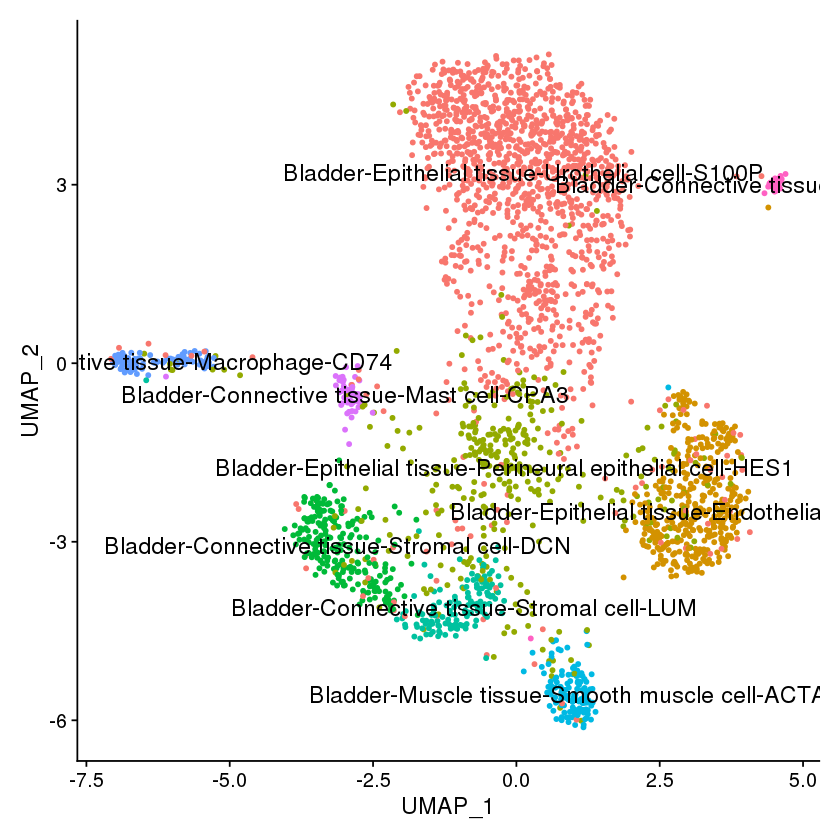

In [40]:
p_umap4 <- UMAPPlot(rr2,label = T, pt.size=1,label.size=5)+NoLegend()
# LabelClusters(plot = p_umap4, id = 'ident', color = 'white')
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap4, width = 25, height = 15)
p_umap4

In [23]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE,)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11



In [41]:

write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
# 
dataobj<-AddMetaData(dataobj, metadata =as.character(annodataobj@active.ident),col.name='hcad.label') 

write.table(cbind(colnames(dataobj), dataobj$hcad.label), file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = c('cell_ID','cell_cluster'))

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))